FileNotFoundError: [Errno 2] No such file or directory: 'ENCFF092DWH_sequences.fasta'

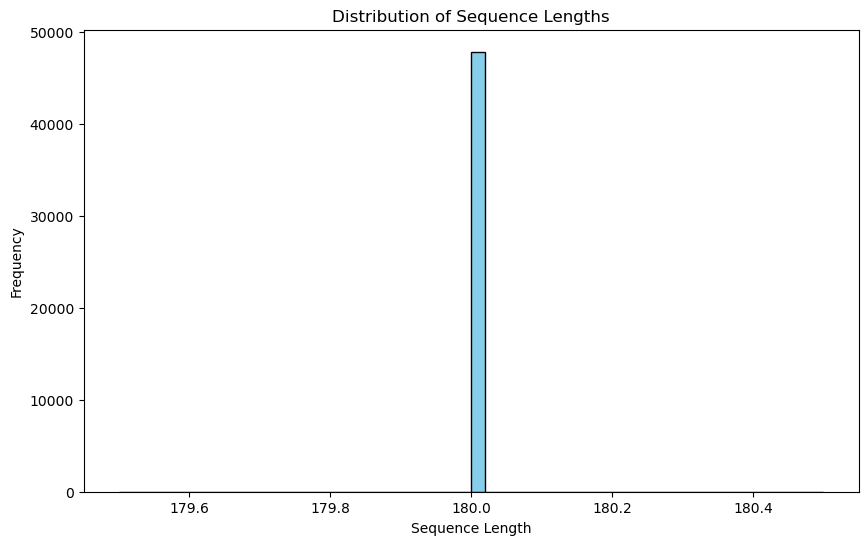

Minimum length: 180
Maximum length: 180
Average length: 180.00


In [10]:
from Bio import SeqIO
import matplotlib.pyplot as plt

# Load sequences
sequences = list(SeqIO.parse("processed_ENCFF092DWH.fasta", "fasta"))

# Get lengths of all sequences
lengths = [len(seq.seq) for seq in sequences]

# Plot the distribution of sequence lengths
plt.figure(figsize=(10, 6))
plt.hist(lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

# Print basic statistics
print(f"Minimum length: {min(lengths)}")
print(f"Maximum length: {max(lengths)}")
print(f"Average length: {sum(lengths)/len(lengths):.2f}")


In [15]:
import os
from Bio import SeqIO

# Directory containing your processed FASTA files
data_dir = "/users/hutruon/Assignment-1-CS490/Data/processed_180"

# Expected sequence length
expected_length = 180

# Function to check sequence lengths in a FASTA file
def check_fasta_lengths(filepath, expected_length):
    with open(filepath, "r") as handle:
        for record in SeqIO.parse(handle, "fasta"):
            if len(record.seq) != expected_length:
                return False
    return True

# Loop through each file in the data directory
for filename in os.listdir(data_dir):
    if filename.endswith(".fasta"):
        filepath = os.path.join(data_dir, filename)
        if not check_fasta_lengths(filepath, expected_length):
            print(f"File {filename} contains sequences not {expected_length} bp long.")

print("Finished checking all FASTA files.")

Finished checking all FASTA files.


In [17]:
from Bio import SeqIO
import os

data_dir = "/users/hutruon/Assignment-1-CS490/Data"
output_dir = "/users/hutruon/Assignment-1-CS490/Data/"
expected_length = 180

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def process_fasta_sequences(filepath, output_filepath, expected_length):
    with open(filepath, "r") as input_handle, open(output_filepath, "w") as output_handle:
        sequences = SeqIO.parse(input_handle, "fasta")
        for record in sequences:
            if len(record.seq) == expected_length:
                SeqIO.write(record, output_handle, "fasta")

for filename in os.listdir(data_dir):
    if filename.endswith(".fasta"):
        filepath = os.path.join(data_dir, filename)
        output_filepath = os.path.join(output_dir, f"trimmed_{filename}")
        process_fasta_sequences(filepath, output_filepath, expected_length)

print("Finished processing all FASTA files.")

KeyboardInterrupt: 

In [20]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import os

def preprocess_fasta(input_file, output_file, target_length, max_unknowns_ratio=0.1):
    processed_records = []
    for record in SeqIO.parse(input_file, "fasta"):
        sequence = str(record.seq)
        unknowns_ratio = sequence.upper().count('N') / len(sequence)
        
        if unknowns_ratio <= max_unknowns_ratio and len(sequence) >= target_length:
            trimmed_seq = sequence[:target_length]  # Trim to target length
            processed_record = SeqRecord(Seq(trimmed_seq), id=record.id, description="")
            processed_records.append(processed_record)
    
    SeqIO.write(processed_records, output_file, "fasta")

def batch_process(directory, target_length, suffix="_processed.fasta"):
    for filename in os.listdir(directory):
        if filename.endswith(".fasta"):
            input_file = os.path.join(directory, filename)
            output_file = os.path.join(directory, filename.replace(".fasta", suffix))
            preprocess_fasta(input_file, output_file, target_length)

# Update these paths according to your directory structure
positive_data_dir = "/users/hutruon/Assignment-1-CS490/Data/processed_180"
negative_data_dir = "/users/hutruon/Assignment-1-CS490/Data"
target_length = 180  # Define your uniform sequence length

# Process positive dataset
batch_process(positive_data_dir, target_length, suffix="_uniform.fasta")

# Process negative dataset
batch_process(negative_data_dir, target_length, suffix="_uniform.fasta")

In [21]:
from Bio import SeqIO
import os

def check_uniform_length(fasta_path):
    """
    Check if all sequences in a FASTA file are of the same length and return that length.
    """
    lengths = [len(record.seq) for record in SeqIO.parse(fasta_path, "fasta")]
    if len(set(lengths)) == 1:
        return lengths[0]  # All sequences have the same length
    else:
        return None  # Sequences have varying lengths

# Paths to your directories or specific files
positive_dataset_path = "/users/hutruon/Assignment-1-CS490/Data/processed_180"
negative_dataset_path = "/users/hutruon/Assignment-1-CS490/Data"


# Example for checking a single file, extend this to loop over directories if needed
positive_length = check_uniform_length(positive_dataset_path)
negative_length = check_uniform_length(negative_dataset_path)

if positive_length and negative_length and positive_length == negative_length:
    print(f"Both positive and negative datasets have uniform sequence lengths of {positive_length} bp.")
else:
    print("The datasets do not have uniform sequence lengths or do not match in length.")


FileNotFoundError: [Errno 2] No such file or directory: '/path/to/your/positive_dataset'

In [23]:
from Bio import SeqIO
import os

def check_uniform_length(fasta_path):
    """
    Check if all sequences in a FASTA file are of the same length and return that length.
    """
    lengths = [len(record.seq) for record in SeqIO.parse(fasta_path, "fasta")]
    if len(set(lengths)) == 1:
        return lengths[0]  # All sequences have the same length
    else:
        return None  # Sequences have varying lengths

# Paths to directories or specific files
positive_data_dir = "/users/hutruon/Assignment-1-CS490/Data/processed_180"
negative_data_dir = "/users/hutruon/Assignment-1-CS490/Data"

# Initialize variables to store the unique lengths found
positive_lengths = set()
negative_lengths = set()

# Function to process files in a directory
def process_files(data_dir, length_set):
    for filename in os.listdir(data_dir):
        if "uniform" in filename and filename.endswith(".fasta"):
            file_path = os.path.join(data_dir, filename)
            length = check_uniform_length(file_path)
            if length is not None:
                length_set.add(length)

# Process the positive and negative datasets
process_files(positive_data_dir, positive_lengths)
process_files(negative_data_dir, negative_lengths)

# Check if there's exactly one unique length in each dataset and if they match
if len(positive_lengths) == 1 and len(negative_lengths) == 1 and list(positive_lengths)[0] == list(negative_lengths)[0]:
    print(f"Both datasets have uniformly sized sequences of {list(positive_lengths)[0]} bp.")
else:
    print("Datasets do not have uniform sequence lengths or do not match in length.")
    print(f"Positive dataset lengths: {positive_lengths}")
    print(f"Negative dataset lengths: {negative_lengths}")


Both datasets have uniformly sized sequences of 180 bp.
